# Lecture 26 Linear Regression
__MATH 3480__ - Dr. Michael Olson

Reading:
* Geron: Chapter 4

## Regression
We have just finished talking about a number of machine learning classification models. As a reminder, classification is a form of discrete, supervised learning.

[Machine Learning Landscape](https://raw.githubusercontent.com/drolsonmi/math3480/main/Notes/Images/3480_ML_Landscape.png)

Now, we will turn our attention to regression, which would be a form of continuous, supervised learning. As we can see in our diagram, there are a number of regression models to choose from. Today, we will focus on linear regression, polynomial regression, and logistic regression.

The difference between regression and classification is that with classification, every datapoint will point to a specific class or category. With regression, however, we are dealing with continuous variables, so we are looking at a result that could be anywhere on a number scale. Most common model predictions, such as weather predictions, use regression models.

-----
## Linear Regression
We've already learned about linear regression. It is a model that we learned about in basics statistics classes. The idea is to find a line that fits through the middle of your data and then use that line to estimate a result based on your inputs.

<Axes: xlabel='petal_length', ylabel='petal_width'>

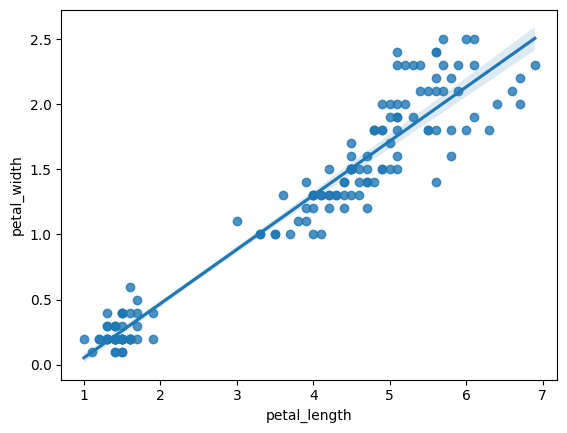

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
sns.regplot(data=iris, x='petal_length', y='petal_width')

The __correlation__ (the strength of the relationship between the two variables) is found as,
$$r = \frac{1}{n-1}\sum\left(\frac{x-\bar{x}}{s_x}\frac{y-\bar{y}}{s_y}\right)$$

This is the elementary version. There is a more effective way using Linear Algebra:
$$E[X] = \sum_{i=1}^n x_i P(x_i) \qquad\qquad Var[X] = E[X^2] - E[X]^2 \qquad\qquad Cov[X,Y] = E\left[(X-E[X])(Y-E[Y])\right] = \frac{\left<X-E[X],Y-E[Y]\right>}{n-1}$$
where $E[X]$ is the expected value.

Example:
* Find the variance of A and of B, then find the covariance between them

|  A  |  B  |
| --- | --- |
|  2  |  16 |
|  3  |  10 |
|  4  |  7  |

$$E[A] = 2\cdot\frac{1}{3} + 3\cdot\frac{1}{3} + 4\cdot\frac{1}{3} = \frac{2+3+4}{3}=3 \qquad E[B] = \frac{16+10+7}{3}=\frac{33}{3}=11$$
$$E[A^2] = 2^2\cdot\frac{1}{3} + 3^2\cdot\frac{1}{3} + 4^2\cdot\frac{1}{3}=\frac{4+9+16}{3}=\frac{29}{3}=9.6667 \qquad E[B^2] = \frac{16^2+10^2+7^2}{3}=\frac{256+100+49}{3}=\frac{405}{3}=135$$
$$Var[A] = 9.6667 - (3)^2 = 0.6667 \qquad Var[B] = 135 - (11)^2 = 14$$

$$Covar[A,B] = \frac{\left<[-1,0,1],[5,-1,-4]\right>}{3-1} = \frac{-5+0-4}{2}=-4.5$$

In [2]:
import numpy as np
A = np.array([2,3,4])
B = np.array([16,10,7])

print(np.var(A))
print()
print(np.cov(A,B))

0.6666666666666666

[[ 1.  -4.5]
 [-4.5 21. ]]


The correlation is then,
$$Corr[X,Y]=\frac{Cov[X,Y]}{s_xs_y} = \dots\left(\text{canceling out the }n-1\text{ terms}\right)\dots = \frac{\left<X-E[X],Y-E[Y]\right>}{||X-E[X]||~||Y-E[Y]||}$$
where the standard deviation of $X$ is $s_x=\sqrt{Var[X]}$. The ($n-1$) terms from the last equation cancel each other out.

Example:
* Find the correlation between A and B
    * Let $\bar{A} = A-E[A] = [-1,0,1]$
    * Let $\bar{B} = B-E[B] = [5,-1,-4]$
      $$Corr[A,B]=\frac{\left<\bar{A},\bar{B}\right>}{||\bar{A}||~||\bar{B}||} = \frac{-5+0-4}{\sqrt{1+0+1}\sqrt{25+1+16}} = \frac{-9}{\sqrt{2}\sqrt{42}}=-0.9820$$

In [3]:
np.corrcoef(A,B)

array([[ 1.        , -0.98198051],
       [-0.98198051,  1.        ]])

Finally, to get the linear regression equation,
$$y = b_0 + b_1x \qquad\qquad b_1 = \frac{\bar{X}\cdot\bar{Y}}{||\bar{X}||^2} \qquad\qquad \bar{X}={x_i - E[X]} \qquad \bar{Y}={y_i - E[Y]}$$

In [4]:
Abar = A-A.mean()
Bbar = B-B.mean()

b1 = (Abar.dot(Bbar)) / (Abar.dot(Abar))

b0 = B.mean() - b1*A.mean()

print(f'y = {b0} + {b1}x')

y = 24.5 + -4.5x


#### Linear Regression using Scikit-Learn

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


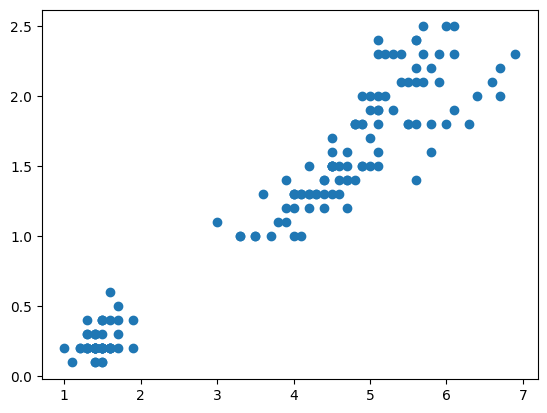

In [6]:
print(iris['feature_names'])
print(iris['data'][:10])

X = iris['data'][:,2] # petal length
y = iris['data'][:,3] # petal width

import matplotlib.pyplot as plt
plt.scatter(X,y)

y = -0.363 + 0.416x


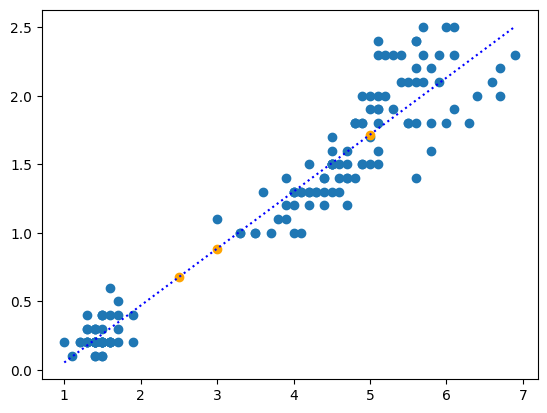

In [7]:
# Train model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X.reshape(-1,1),y.reshape(-1,1))

# Result
print(f'y = {lin_reg.intercept_[0]:0.3f} + {lin_reg.coef_[0,0]:0.3f}x')

# Test model
X_test = np.array([3,2.5,5])
y_test = lin_reg.predict(X_test.reshape(-1,1))

# Graph of results
fig,ax = plt.subplots()
ax.scatter(X,y)
ax.scatter(X_test,y_test,c='orange')

x = np.linspace(X.min(),X.max(),100)
ax.plot(x,lin_reg.coef_[0,0]*x + lin_reg.intercept_[0], c='blue', linestyle=":")

plt.show()